# Capstone project - HealthCare Fraud Detection : XGBoost Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,\
StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_roc_curve,roc_auc_score,f1_score
from sklearn.feature_selection import RFE
from yellowbrick.classifier import confusion_matrix, classification_report, ROCAUC
from yellowbrick.model_selection import CVScores
from cp_clean_helper import show_values
from LGR_helper import std_num_cols, rb_scale_cols, model_results, get_confusion_matrix
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### # Loading datasets, and looking at shapes:-

In [2]:
# Loading train-test 70:30 split (SMOTE and BorderlineSMOTE) datasets
# For these same columns have been drooped as done for the LGR model

trainX_SM = pd.read_csv("trainX_SM.csv",index_col=0)
trainY_SM = pd.read_csv("trainY_SM.csv",index_col=0)
testX_SM = pd.read_csv("testX_SM.csv",index_col=0)
testY_SM = pd.read_csv("testY_SM.csv",index_col=0)

trainX_BSM = pd.read_csv("trainX_BSM.csv",index_col=0)
trainY_BSM = pd.read_csv("trainY_BSM.csv",index_col=0)
testX_BSM = pd.read_csv("testX_BSM.csv",index_col=0)
testY_BSM = pd.read_csv("testY_BSM.csv",index_col=0)

# Looking at dataset shapes

print('\n')
print('Shape of SMOTE balanced trainX data :',trainX_SM.shape)
print('Shape of SMOTE balanced trainY data :',trainY_SM.shape)
print('Shape of SMOTE balanced testX data :',testX_SM.shape)
print('Shape of SMOTE balanced testY data :',testY_SM.shape)
print('Shape of Borderline SMOTE balanced trainX data :',trainX_BSM.shape)
print('Shape of Borderline SMOTE balanced trainY data :',trainY_BSM.shape)
print('Shape of Borderline SMOTE balanced testX data :',testX_BSM.shape)
print('Shape of Borderline SMOTE balanced testY data :',testY_BSM.shape, end='\n')
print('\n')
print("*"*60)

# Looking at class ratios

print('\n')
print('Class ratio - Fraud/Non-Fraud (trainY_SM) :',trainY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_SM) :',testY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (trainY_BSM) :',trainY_BSM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_BSM) :',testY_BSM.value_counts(normalize=True)*100, end='\n')
print('\n')
print("*"*60)



Shape of SMOTE balanced trainX data : (483580, 44)
Shape of SMOTE balanced trainY data : (483580, 1)
Shape of SMOTE balanced testX data : (207250, 44)
Shape of SMOTE balanced testY data : (207250, 1)
Shape of Borderline SMOTE balanced trainX data : (483580, 44)
Shape of Borderline SMOTE balanced trainY data : (483580, 1)
Shape of Borderline SMOTE balanced testX data : (207250, 44)
Shape of Borderline SMOTE balanced testY data : (207250, 1)


************************************************************


Class ratio - Fraud/Non-Fraud (trainY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (trainY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64


*******

### # Standardizing the train/test features for balanced datasets:

In [3]:
# SMOTE balanced dataset

# std_num_cols(trainX_SM)
# std_num_cols(testX_SM)

# BorderlineSMOTE balanced dataset

# std_num_cols(trainX_BSM)
# std_num_cols(testX_BSM)

### Baseline XGBoost Classifier Model - Standardized:

In [4]:
# SMOTE Balanced

# xg_std_sm = XGBClassifier()
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, xg_std_sm, show = True)

In [5]:
# BorderlineSMOTE Balanced

# xg_std_bsm = XGBClassifier()
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, xg_std_bsm, show = True)

### # Robust Scaling the train/test features for  balanced datasets:

In [6]:
# SMOTE balanced dataset

rb_scale_cols(trainX_SM)
rb_scale_cols(testX_SM)

# BorderlineSMOTE balanced dataset

rb_scale_cols(trainX_BSM)
rb_scale_cols(testX_BSM)

### Baseline XGBoost Model - Robust Scaled:

In [7]:
# SMOTE Balanced

# xg_sm = XGBClassifier()
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, xg_sm, show = True)

In [8]:
# BorderlineSMOTE Balanced

# xg_bsm = XGBClassifier()
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, xg_bsm, show = True)

### # Plotting scores for different depth of trees in the random forest (SM):

In [9]:
# depth_range = range(4, 8)
# train_error = []
# test_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for max_depth in depth_range:
#     xg = XGBClassifier()
#     xg.set_params(max_depth=max_depth)
#     xg.fit(trainX_SM, trainY_SM)
#     train_error.append(1 - xg.score(trainX_SM, trainY_SM))
#     test_error.append(1 - xg.score(testX_SM, testY_SM))
#     train_AUC.append(roc_auc_score(trainY_SM, xg.predict(trainX_SM)))
#     test_AUC.append(roc_auc_score(testY_SM, xg.predict(testX_SM)))
#     train_F1.append(f1_score(trainY_SM, xg.predict(trainX_SM)))
#     test_F1.append(f1_score(testY_SM, xg.predict(testX_SM)))

In [10]:
# plt.plot(depth_range, train_error, c='red', label='Training Error')
# plt.plot(depth_range, test_error, c='blue', label='Test Error')
# plt.ylabel('Errors')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [11]:
# plt.plot(depth_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(depth_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [12]:
# plt.plot(depth_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(depth_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

### # Plotting scores for different number of trees in the random forest (SM):

In [13]:
# tree_range = range(80, 160, 20)
# train_error = []
# test_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for n_estimators in tree_range:
#     xg = XGBClassifier()
#     xg.set_params(n_estimators=n_estimators)
#     xg.fit(trainX_SM, trainY_SM)
#     train_error.append(1 - xg.score(trainX_SM, trainY_SM))
#     test_error.append(1 - xg.score(testX_SM, testY_SM))
#     train_AUC.append(roc_auc_score(trainY_SM, xg.predict(trainX_SM)))
#     test_AUC.append(roc_auc_score(testY_SM, xg.predict(testX_SM)))
#     train_F1.append(f1_score(trainY_SM, xg.predict(trainX_SM)))
#     test_F1.append(f1_score(testY_SM, xg.predict(testX_SM)))

In [14]:
# plt.plot(tree_range, train_error, c='red', label='Training Error')
# plt.plot(tree_range, test_error, c='blue', label='Test Error')
# plt.ylabel('Errors')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [15]:
# plt.plot(tree_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(tree_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [16]:
# plt.plot(tree_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(tree_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

## Using RandomizedSearchCV to select best parameters for SM dataset:

In [17]:
# # # Setting x and y variables

# tr_x = trainX_SM
# tr_y = trainY_SM
# ts_x = testX_SM
# ts_y = testY_SM

# # Setting up xgb_sm model

# xg_sm = XGBClassifier()

# # Setting the parameter grid

# grid_para_xgb = [{
#     "n_estimators": [110,120,130],
#     "max_depth": [6,6.5,7],
#     "learning_rate": np.linspace(1e-2,1,20),
#     "colsample_bytree" : [0.5,0.7,1,1.2],
#     "subsample": [0.6,0.8,1,1.2],
#     "min_child_weight" : [1,3,5,7]}]

# # Running the XGB model through the grid search

# grid_search_xgb = RandomizedSearchCV(xg_sm, grid_para_xgb,\
#                                      cv=5,scoring='f1_weighted',verbose=1,\
#                                      return_train_score = True, n_jobs=-1)

# grid_search_xgb.fit(tr_x, tr_y)

In [18]:
# The best parameters:

# grid_search_xgb.best_params_

In [19]:
# The best score

# grid_search_xgb.best_score_

In [20]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_xgb.best_estimator_.score(tr_x, tr_y)))
# print("The test     error is: %.5f" % (1 - grid_search_xgb.best_estimator_.score(ts_x, ts_y)))

## Using RandomizedSearchCV to select best parameters for BSM dataset:

In [21]:
# # # Setting x and y variables

# tr_x = trainX_BSM
# tr_y = trainY_BSM
# ts_x = testX_BSM
# ts_y = testY_BSM

# # Setting up xgb_sm model

# xg_bsm = XGBClassifier()

# # Setting the parameter grid

# grid_para_xgb = [{
#     "n_estimators": [110,120,130],
#     "max_depth": [6,6.5,7],
#     "learning_rate": np.linspace(1e-2,1,20),
#     "colsample_bytree" : [0.5,0.7,1,1.2],
#     "subsample": [0.6,0.8,1,1.2],
#     "min_child_weight" : [1,3,5,7]}]

# # Running the XGB model through the grid search

# grid_search_xgb = RandomizedSearchCV(xg_bsm, grid_para_xgb,\
#                                      cv=5,scoring='f1_weighted',verbose=1,\
#                                      return_train_score = True, n_jobs=-1)

# grid_search_xgb.fit(tr_x, tr_y)

In [22]:
# The best parameters:

# grid_search_xgb.best_params_

In [23]:
# The best score

# grid_search_xgb.best_score_

In [24]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_xgb.best_estimator_.score(tr_x, tr_y)))
# print("The test     error is: %.5f" % (1 - grid_search_xgb.best_estimator_.score(ts_x, ts_y)))

### # Selecting the best model from the Grid Search as the final XGB SM model:

In [25]:
# xg_sm = XGBClassifier(subsample=1, n_estimators=130, min_child_weight=7,\
#                       max_depth=6, learning_rate=0.7395, colsample_bytree=0.7)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, xg_sm, show = True)

### # Selecting the best model from the Grid Search as the final XGB BSM model:

In [26]:
# xg_bsm = XGBClassifier(subsample=1, n_estimators=110, min_child_weight=3,\
#                       max_depth=7, learning_rate=0.9479, colsample_bytree=0.5)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, xg_bsm, show = True)

### # Feature Selection with RFE:

In [27]:
# Extracting top 20 best features with RFE:

xg_sm = XGBClassifier(subsample=1, n_estimators=130, min_child_weight=7,\
                      max_depth=6, learning_rate=0.7395, colsample_bytree=0.7)
rfe1 = RFE(estimator=xg_sm, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rfe1, show=True)

[12:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[0.8741780057074321,
 0.8622291917973463,
 0.8947418235355978,
 0.8210470446320869]

In [28]:
# Looking at RFE feature selection

print(trainX_SM.columns[rfe1.support_])

Index(['Gender', 'RenalDiseaseIndicator', 'State', 'County', 'Age', 'DOB_year',
       'DOB_month', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid', 'ClmDiagnosisCode_2',
       'ClmProcedureCode_2', 'Hospital_Stay', 'Claim_Start_Month',
       'Insurance_Covered_Per', 'Total_Claim_Amt', 'Physician_Count',
       'Hospital_Count', 'Chr_Cond_Count'],
      dtype='object')


In [29]:
# Extracting top 20 best features with RFE:

xg_bsm = XGBClassifier(subsample=1, n_estimators=110, min_child_weight=3,\
                      max_depth=7, learning_rate=0.9479, colsample_bytree=0.5)

rfe2 = RFE(estimator=xg_bsm, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rfe2, show=True)

[13:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[0.8877186815004756,
 0.8698866103739445,
 0.8980011422044546,
 0.8345669481302774]

In [30]:
# Looking at RFE feature selection

print(trainX_BSM.columns[rfe2.support_])

Index(['Gender', 'RenalDiseaseIndicator', 'State', 'County', 'Age', 'DOB_year',
       'DOB_month', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_2', 'Hospital_Stay', 'Claim_Start_Year',
       'Claim_Start_Month', 'Insurance_Covered_Per', 'Total_Claim_Amt',
       'Physician_Count', 'Chr_Cond_Count'],
      dtype='object')


### # Final models with selected features:

In [31]:
# Model using RFE 20 features

selected_feat1 = trainX_SM.columns[rfe1.support_]

model_results(trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM, xg_sm, show=True)

[13:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Model Results for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.7395, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
*****************

[0.8741780057074321,
 0.8622291917973463,
 0.8947418235355978,
 0.8210470446320869]

In [32]:
# Model using RFE 20 features

selected_feat2 = trainX_BSM.columns[rfe2.support_]

model_results(trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM, xg_bsm, show=True)

[13:02:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Model Results for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.9479, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=110, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
*****************

[0.8877186815004756,
 0.8698866103739445,
 0.8980011422044546,
 0.8345669481302774]

## Feature Selection and importance scores calculation

- XGBoost has inbuilt feature selection capabilities for feature selection and highlighting importance scores calculation.

In [33]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1584x864 with 0 Axes>

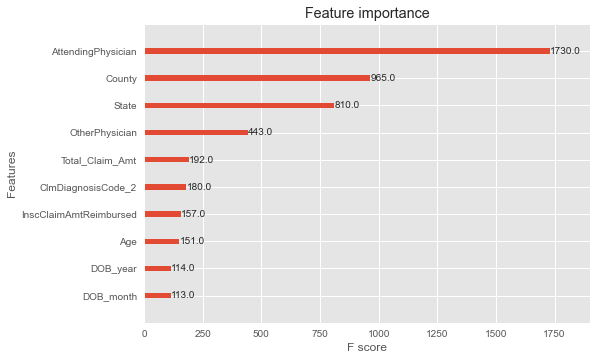

In [34]:
plt.figure(figsize = (22,12))
plot_importance(xg_sm,importance_type='weight', max_num_features=10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1584x864 with 0 Axes>

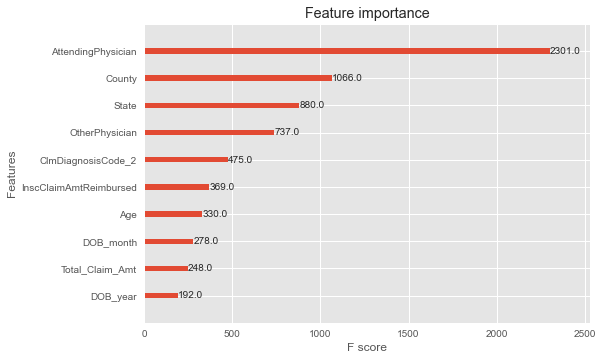

In [35]:
plt.figure(figsize = (22,12))
plot_importance(xg_bsm,importance_type='weight', max_num_features=10)

### # Full set of evaluation metrics for both models:

- Confusion matrix:

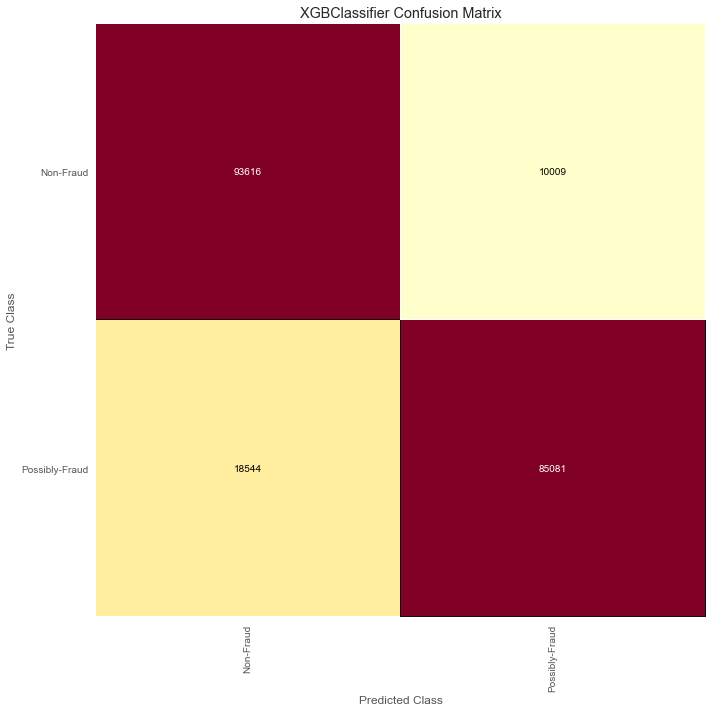

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [36]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
visualizer = confusion_matrix(
    xg_sm,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.show()

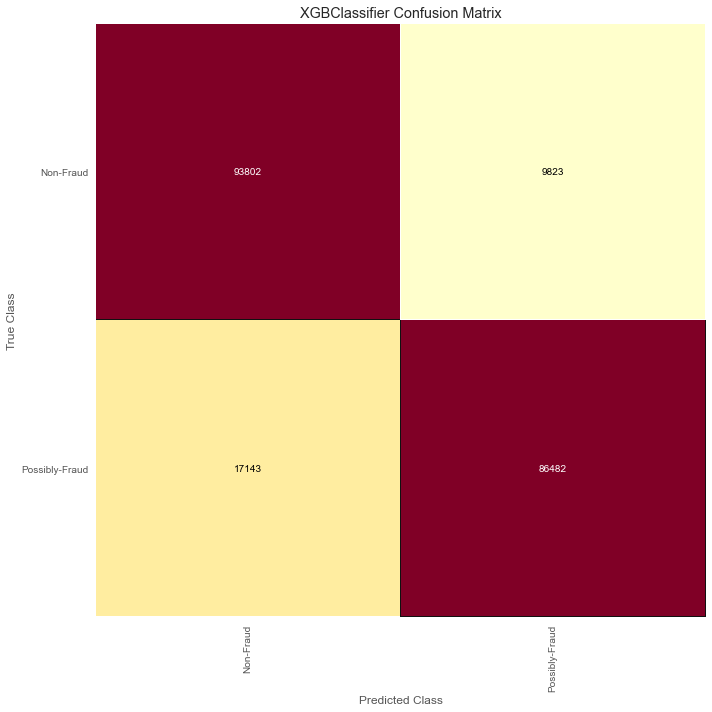

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [37]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
visualizer = confusion_matrix(
    xg_bsm,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.show()

- AUC/ROC curve

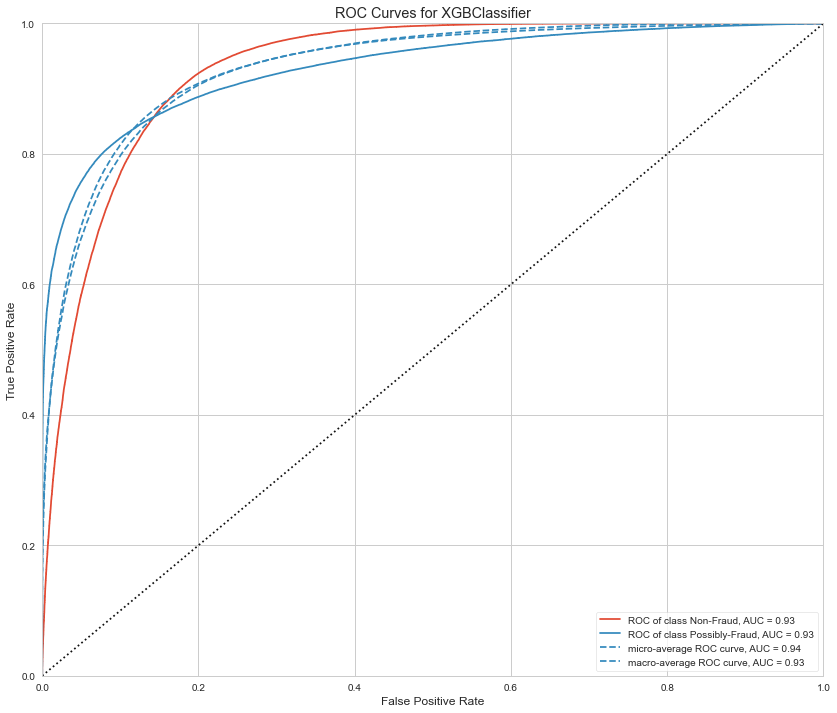

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")

visualizer = ROCAUC(xg_sm, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_SM[selected_feat1], trainY_SM)        # Fit the training data to the visualizer
visualizer.score(testX_SM[selected_feat1], testY_SM)        # Evaluate the model on the test data

visualizer.show()

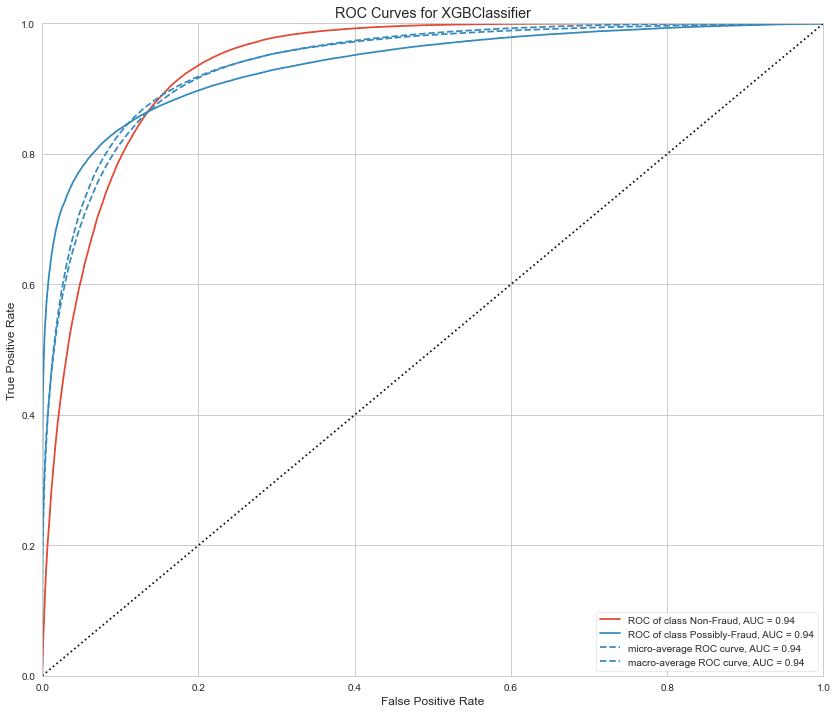

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")

visualizer = ROCAUC(xg_bsm, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_BSM[selected_feat2], trainY_BSM)        # Fit the training data to the visualizer
visualizer.score(testX_BSM[selected_feat2], testY_BSM)        # Evaluate the model on the test data

visualizer.show()

- Classification report

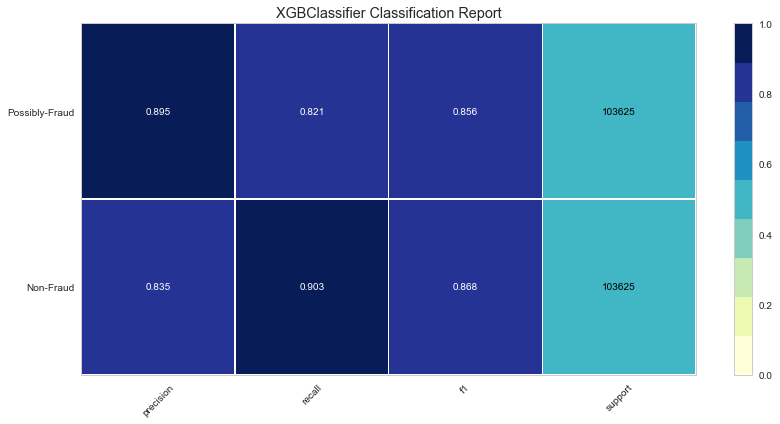

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [40]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    xg_sm,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

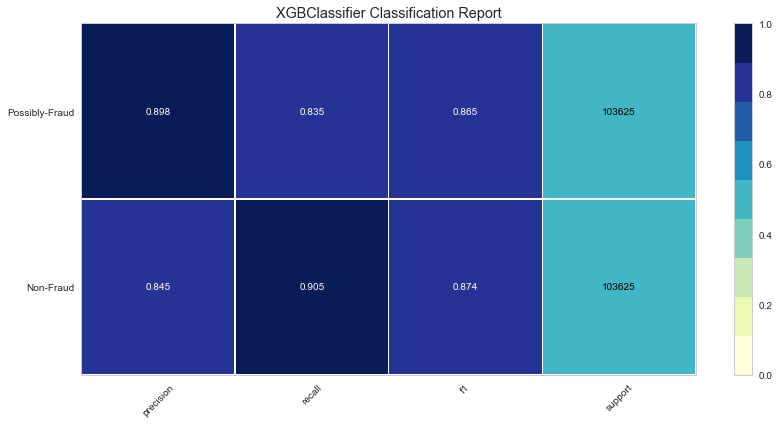

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [41]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    xg_bsm,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

- Precision-recall curve

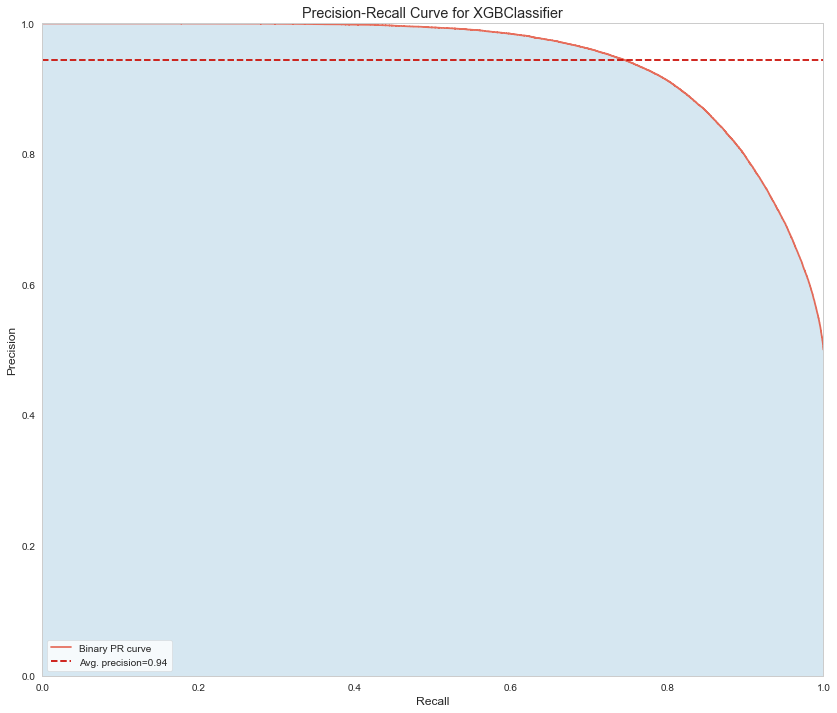

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [42]:
# Visualizing precision-recall curve

from yellowbrick.classifier import precision_recall_curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(xg_sm, trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM)
viz.show()

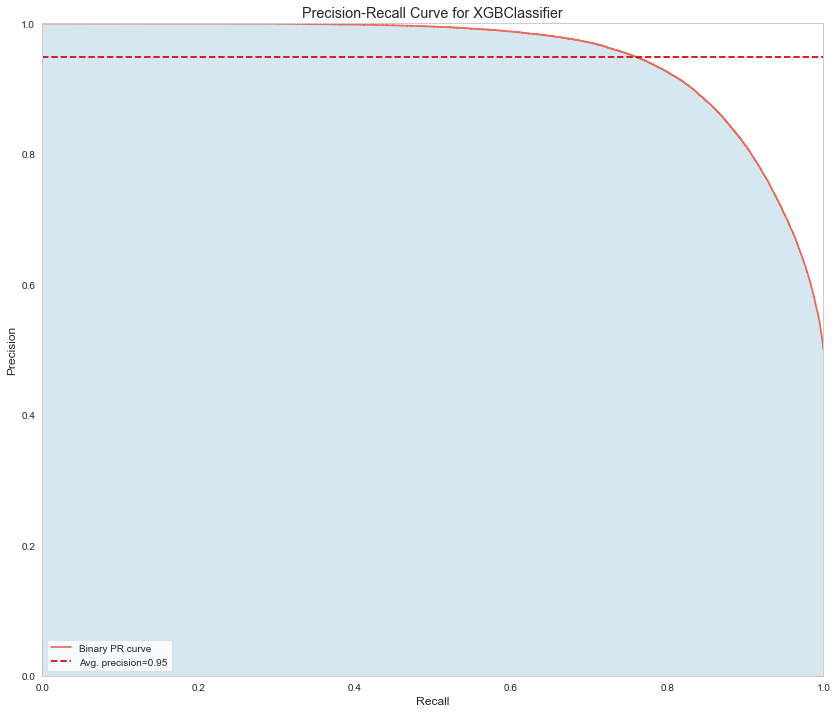

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [43]:
# Visualizing precision-recall curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(xg_bsm, trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM)
viz.show()

- Prediction error

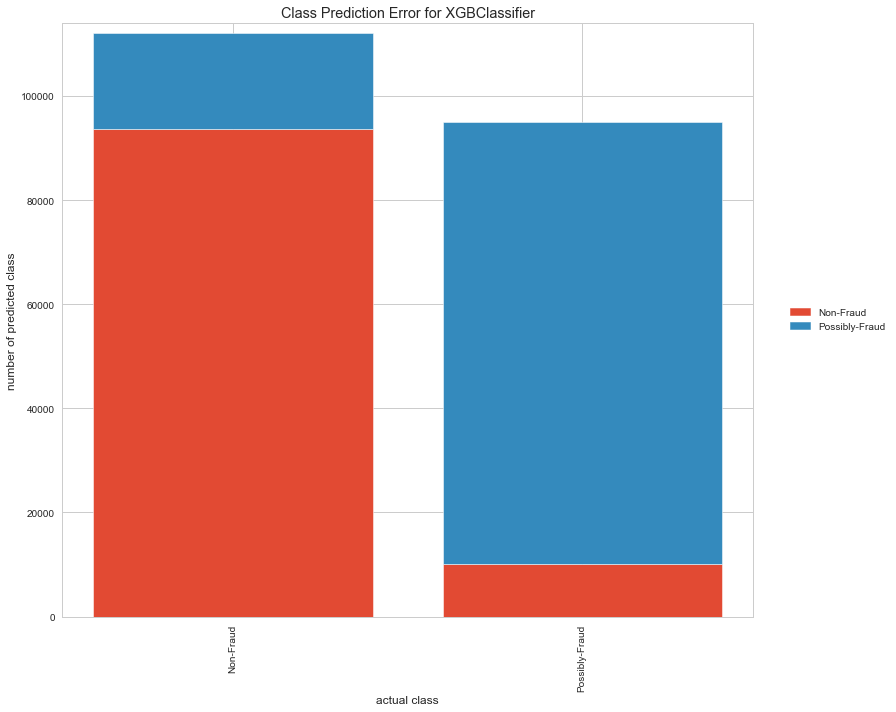

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [44]:
# Visualizing prediction error

from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    xg_sm,
    trainX_SM[selected_feat1], trainY_SM.values.ravel(),
    testX_SM[selected_feat1], testY_SM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

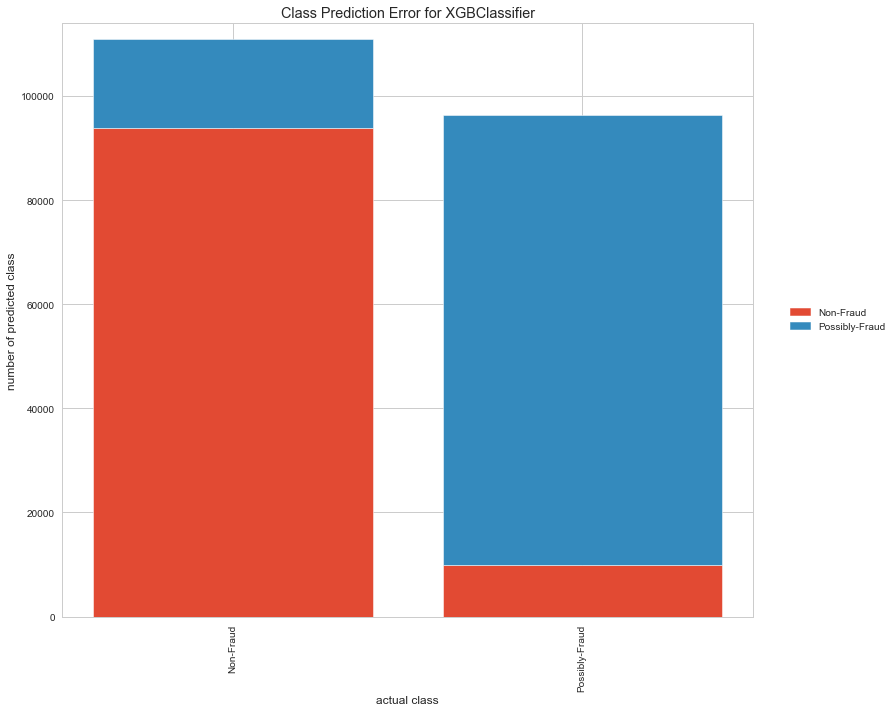

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [45]:
# Visualizing prediction error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    xg_bsm,
    trainX_BSM[selected_feat2], trainY_BSM.values.ravel(),
    testX_BSM[selected_feat2], testY_BSM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

### # Threshold selection for both:

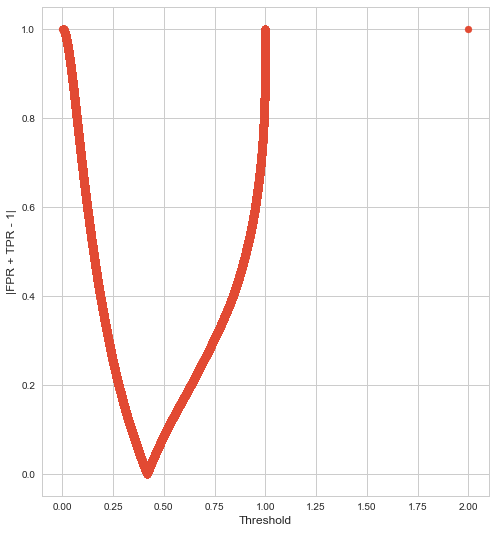

In [46]:
# Visualizing the threshold

from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
fpr1, tpr1, thresholds1 = roc_curve(trainY_SM,xg_sm.predict_proba(trainX_SM[selected_feat1])[:,1],drop_intermediate=False)

plt.figure(figsize = (8,9))
plt.scatter(thresholds1,np.abs(fpr1+tpr1-1),linewidths=0.3)
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [47]:
thresholds1[np.argmin(np.abs(fpr1+tpr1-1))]

0.4169405

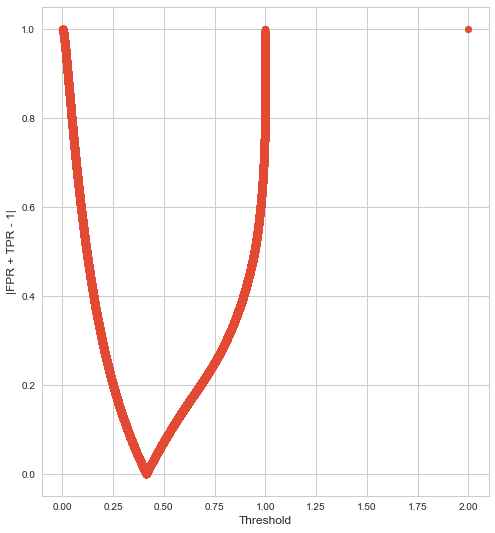

In [48]:
# Visualizing the threshold

sns.set_style("whitegrid")
fpr2, tpr2, thresholds2 = roc_curve(trainY_BSM,xg_bsm.predict_proba(trainX_BSM[selected_feat2])[:,1],drop_intermediate=False)

plt.figure(figsize = (8,9))
plt.scatter(thresholds2,np.abs(fpr2+tpr2-1),linewidths=0.3)
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [49]:
thresholds2[np.argmin(np.abs(fpr2+tpr2-1))]

0.41357762

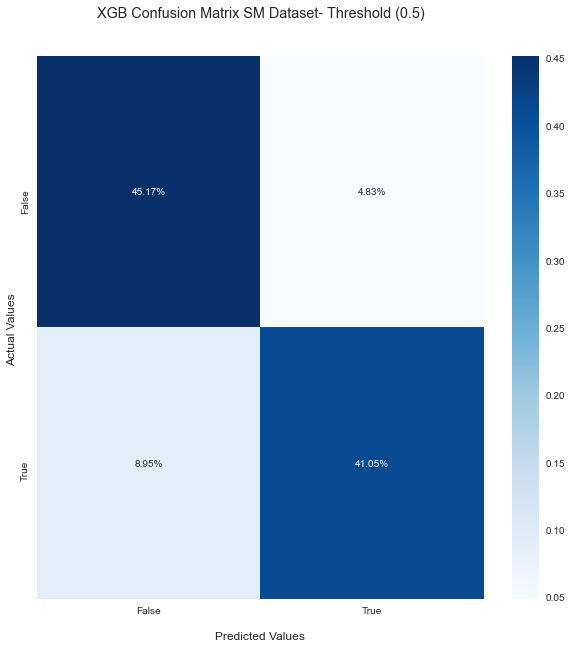

In [50]:
# Looking at confusion matrix (thres=0.5)

cm1 = get_confusion_matrix(xg_sm, testX_SM[selected_feat1], testY_SM, thres=0.5)

#Plotting the confusion matrix

labels = ['Non-Fraud', 'Possibly-Fraud']

plt.figure(figsize = (10,10))

ax = sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('XGB Confusion Matrix SM Dataset- Threshold (0.5)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

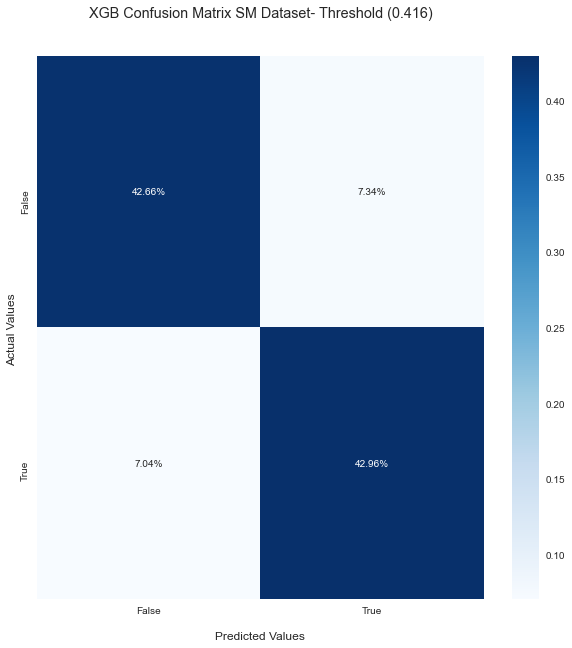

In [51]:
# Looking at confusion matrix (thres=0.416)

cm1 = get_confusion_matrix(xg_sm, testX_SM[selected_feat1], testY_SM, thres=0.416)

#Plotting the confusion matrix

labels = ['Non-Fraud', 'Possibly-Fraud']

plt.figure(figsize = (10,10))

ax = sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('XGB Confusion Matrix SM Dataset- Threshold (0.416)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

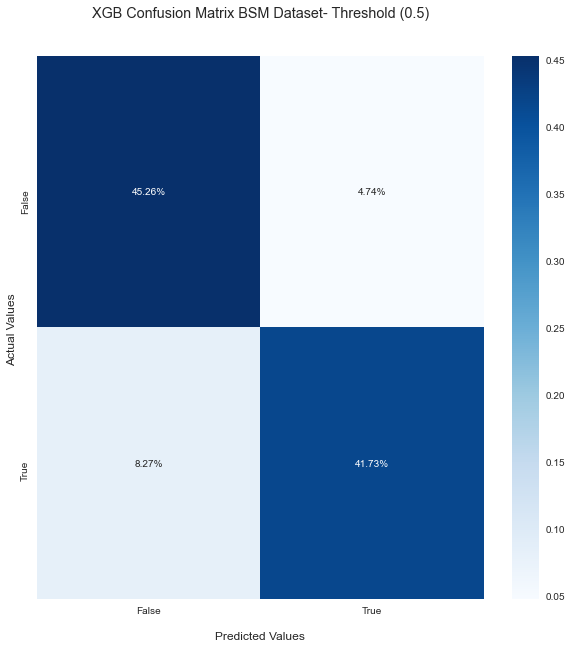

In [52]:
# Looking at confusion matrix (thres=0.5)

cm2 = get_confusion_matrix(xg_bsm, testX_BSM[selected_feat2], testY_BSM, thres=0.5)

#Plotting the confusion matrix

labels = ['Non-Fraud', 'Possibly-Fraud']

plt.figure(figsize = (10,10))

ax = sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('XGB Confusion Matrix BSM Dataset- Threshold (0.5)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

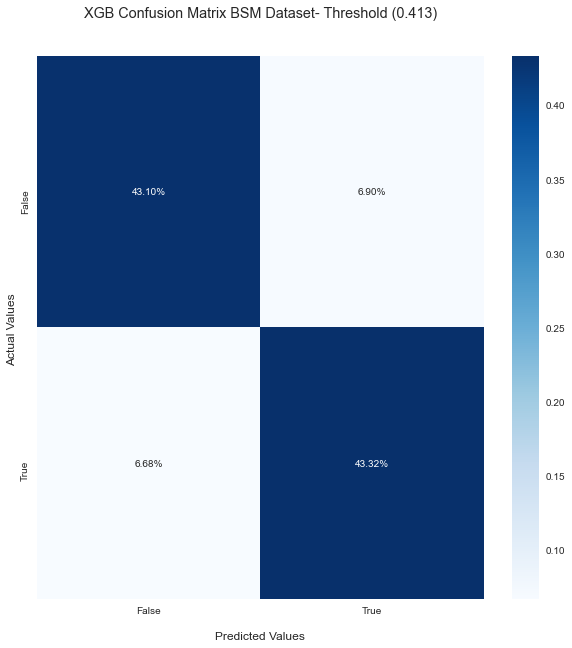

In [53]:
# Looking at confusion matrix (thres=0.413)

cm2 = get_confusion_matrix(xg_bsm, testX_BSM[selected_feat2], testY_BSM, thres=0.413)

#Plotting the confusion matrix

labels = ['Non-Fraud', 'Possibly-Fraud']

plt.figure(figsize = (10,10))

ax = sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('XGB Confusion Matrix BSM Dataset- Threshold (0.413)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## SHAP Feature Importance Visualization:

In [54]:
import shap
sns.set_style("whitegrid")

# SM - Explain the model's predictions using SHAP

SMexplainer = shap.TreeExplainer(xg_sm)
SMshap_values = SMexplainer(testX_SM[selected_feat1])

# BSM - Explain the model's predictions using SHAP

BSMexplainer = shap.TreeExplainer(xg_bsm)
BSMshap_values = BSMexplainer(testX_BSM[selected_feat2])

In [55]:
print(f"Length of SMshap_values: {len(SMshap_values)}\n")
print(f"Length of BSMshap_values: {len(BSMshap_values)}\n")
print(f"Sample SMshap_values:\n{SMshap_values[0]}\n")
print(f"Sample BSMshap_values:\n{BSMshap_values[0]}\n")

Length of SMshap_values: 207250

Length of BSMshap_values: 207250

Sample SMshap_values:
.values =
array([ 0.00849574,  0.01594688,  0.72715455,  0.9230122 ,  0.9642094 ,
       -0.9743697 ,  0.03270886,  0.03060623,  0.7130593 , -0.05326618,
        0.05837195, -0.02313758, -0.00315636, -0.06192769, -0.03494954,
       -0.11023891, -0.25837713, -0.00888435,  0.02749891, -0.05738359],
      dtype=float32)

.base_values =
0.07895887

.data =
array([ 0.0000e+00,  0.0000e+00,  1.0000e+01,  4.7000e+02,  6.7000e+01,
        1.9420e+03,  8.0000e+00,  6.0000e+01,  7.7682e+04,  0.0000e+00,
        0.0000e+00,  2.2240e+03,  3.0000e+02, -1.0000e+00,  1.2000e+01,
        1.0000e+02,  6.0000e+01,  0.0000e+00,  4.0000e+00,  8.0000e+00])

Sample BSMshap_values:
.values =
array([-2.8663902e-03,  1.3922818e-02,  4.7397920e-01,  6.5956903e-01,
        1.3055106e+00, -1.4384012e+00,  2.8354142e-02, -1.4060223e-01,
        5.5519181e-01, -1.3480356e-02,  8.4782906e-02, -4.4038225e-02,
        7.0351193e-

In [56]:
print(f"\n SM Expected value: {SMexplainer.expected_value:.2f}")
print(f"Average target value (training data): {testY_SM.mean()}")
print(f"Base value: {np.unique(SMshap_values.base_values)}\n")

print(f"\n BSM Expected value: {BSMexplainer.expected_value:.2f}")
print(f"Average target value (training data): {testY_BSM.mean()}")
print(f"Base value: {np.unique(BSMshap_values.base_values)}\n")


 SM Expected value: 0.08
Average target value (training data): PotentialFraud    0.5
dtype: float64
Base value: [0.07895887]


 BSM Expected value: 0.11
Average target value (training data): PotentialFraud    0.5
dtype: float64
Base value: [0.11150306]



### # Summary Plot

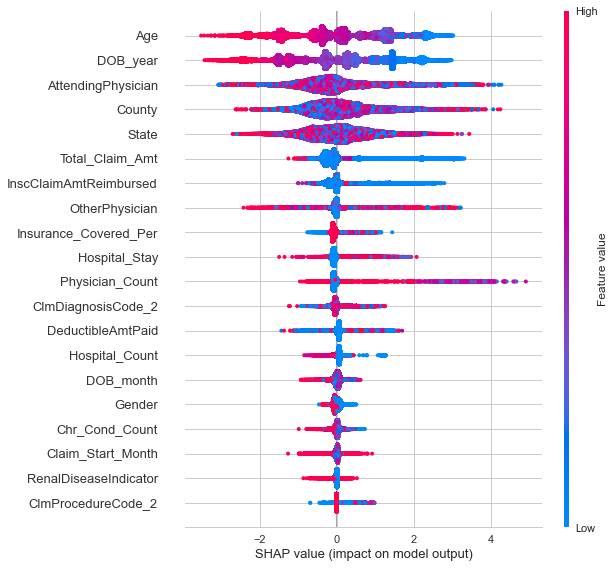

In [57]:
shap.summary_plot(SMshap_values)

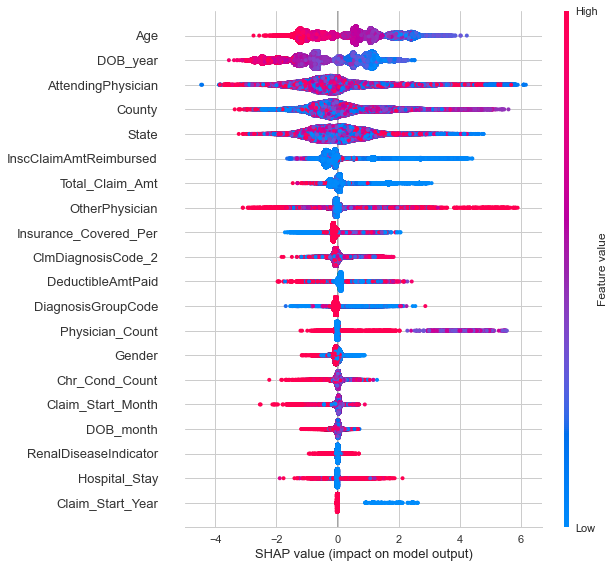

In [58]:
shap.summary_plot(BSMshap_values)

### # Waterfall plot:

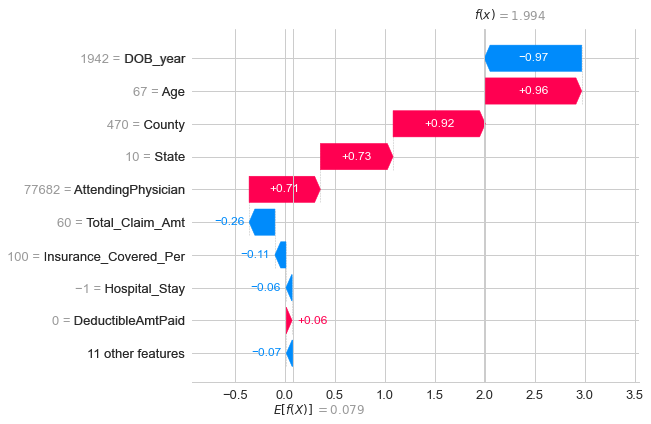

In [59]:
shap.plots.waterfall(SMshap_values[0])

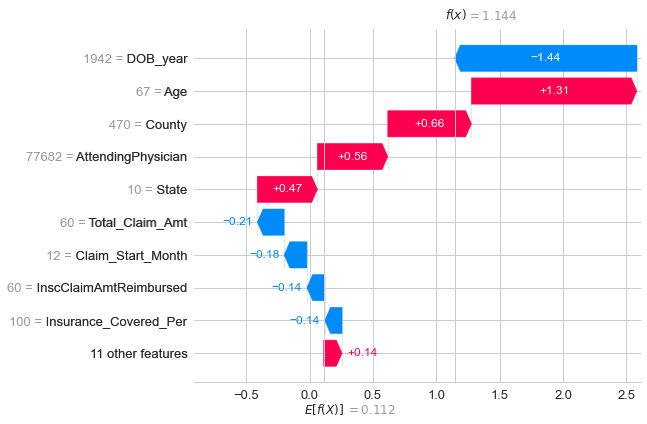

In [60]:
shap.plots.waterfall(BSMshap_values[0])

### # Force Plot (first prediction)

In [61]:
# print the JS visualization code to the notebook
shap.initjs()

In [62]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(SMshap_values[0])

In [63]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(BSMshap_values[0])

In [67]:
shap.force_plot(SMshap_values[1,:])

In [68]:
shap.force_plot(BSMshap_values[1,:])

In [70]:
# visualize 1000 training set predictions
shap.plots.force(SMshap_values[:1000,:])

In [71]:
# visualize 1000 training set predictions
shap.plots.force(BSMshap_values[:1000,:])

### # Bar Plot:

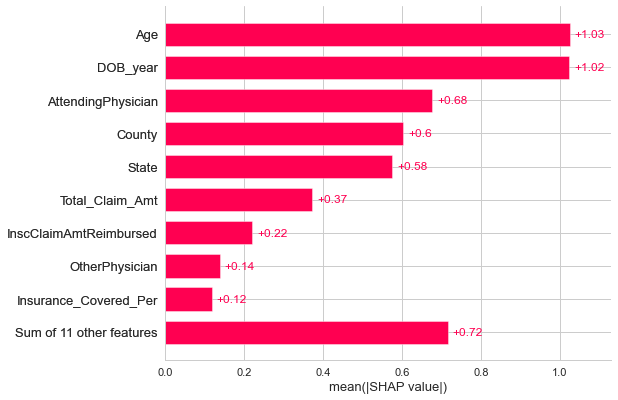

In [72]:
shap.plots.bar(SMshap_values)

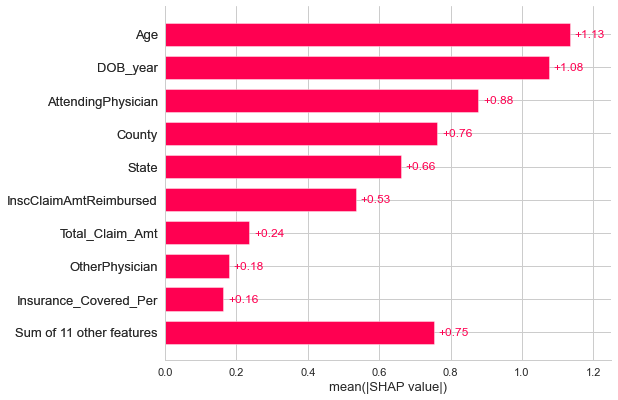

In [73]:
shap.plots.bar(BSMshap_values)

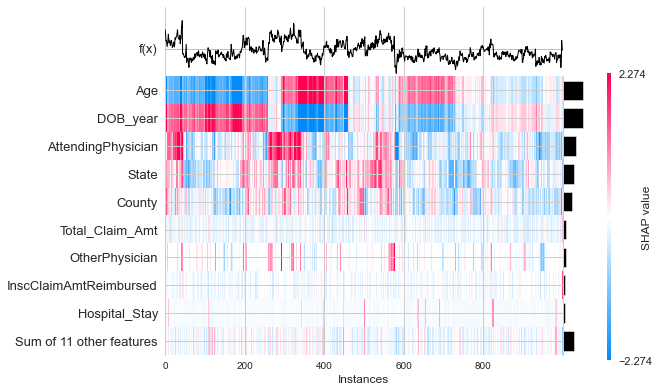

In [81]:
shap.plots.heatmap(SMshap_values[:1000,:])

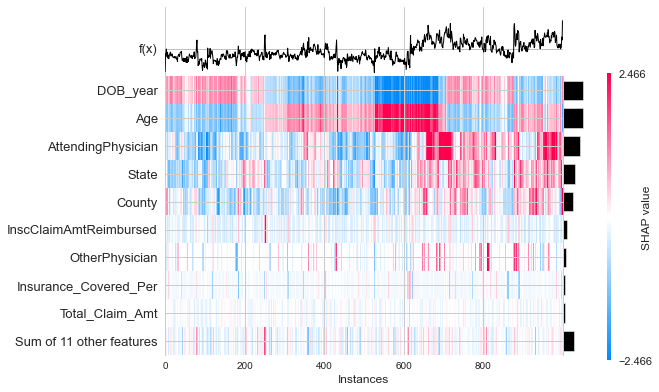

In [82]:
shap.plots.heatmap(BSMshap_values[:1000,:])

### # Dependence Plots:

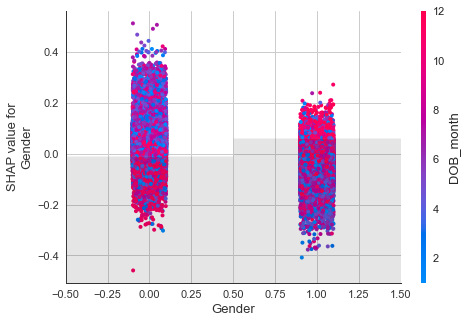

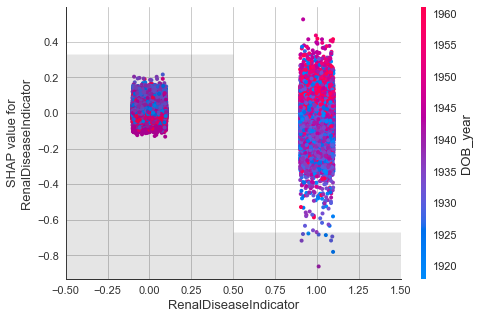

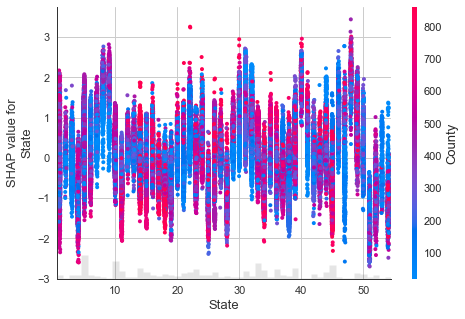

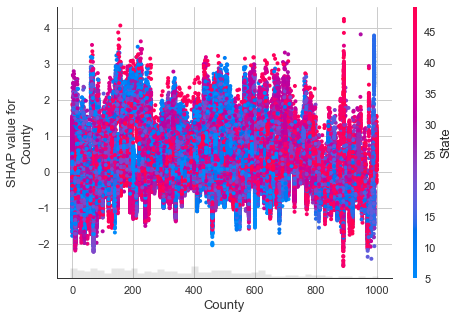

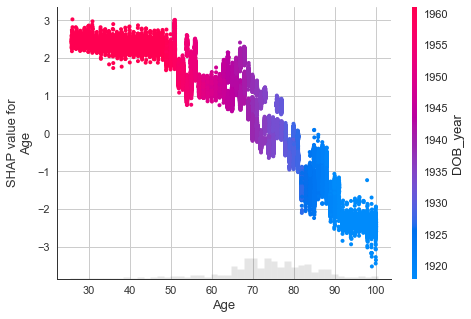

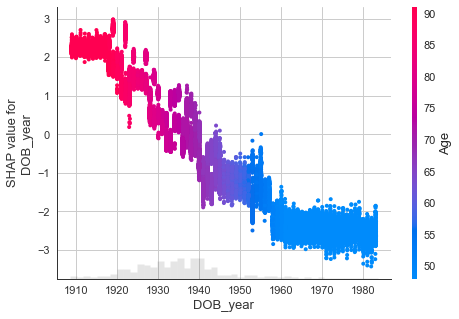

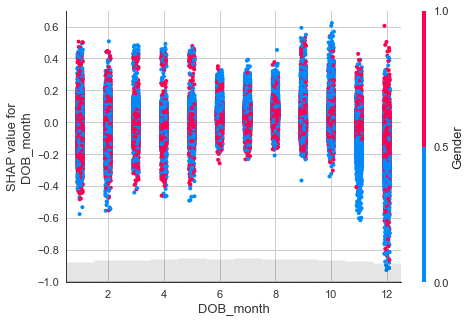

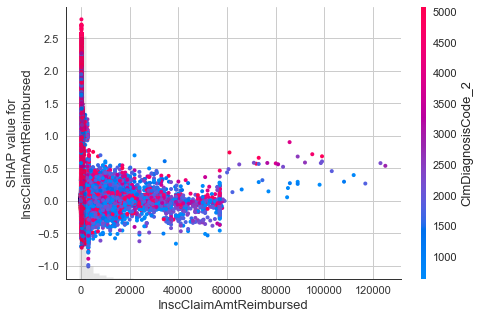

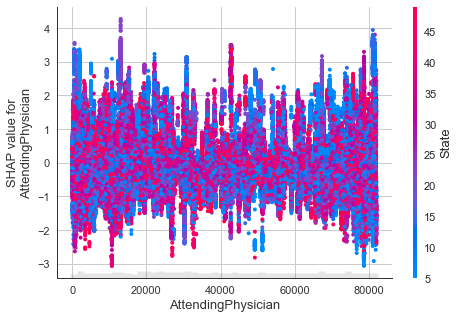

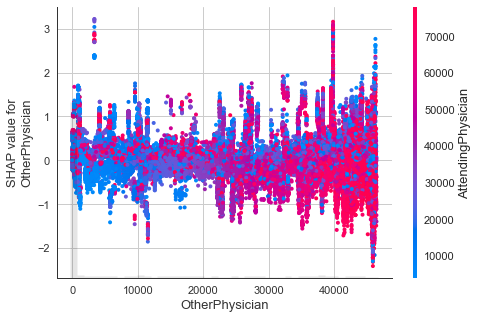

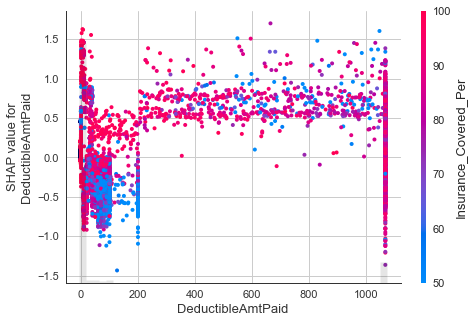

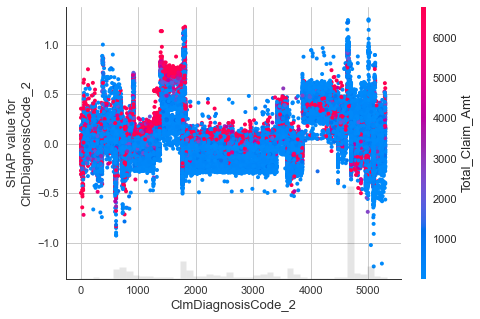

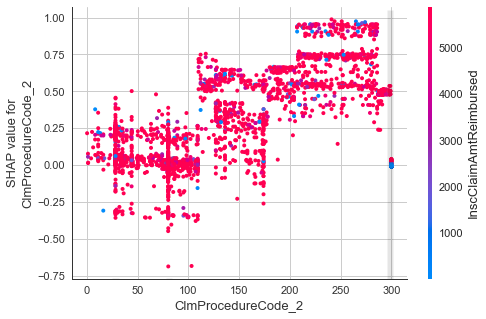

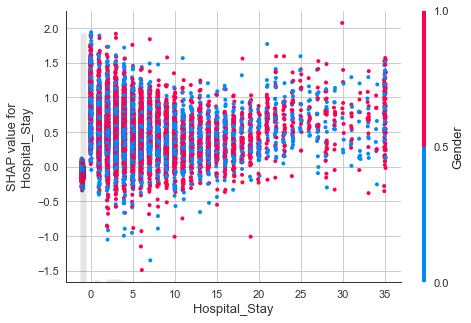

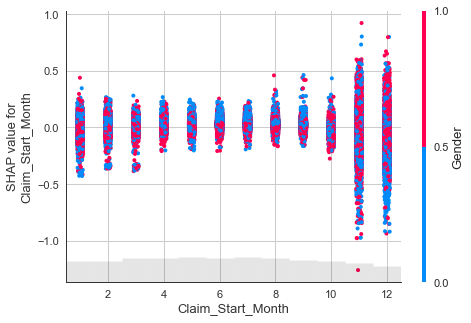

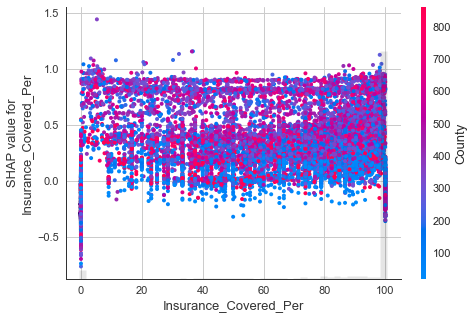

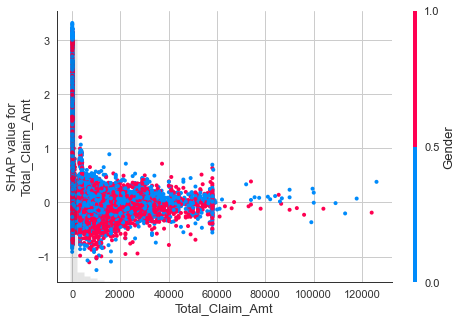

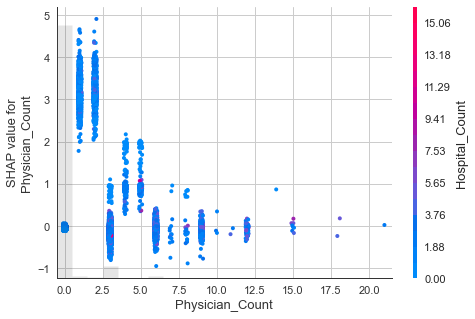

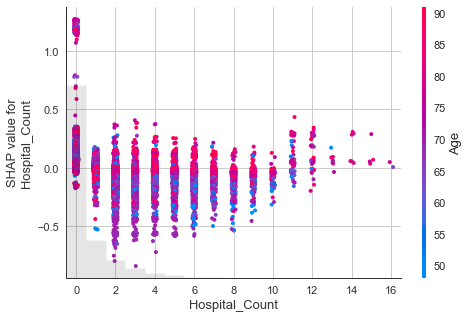

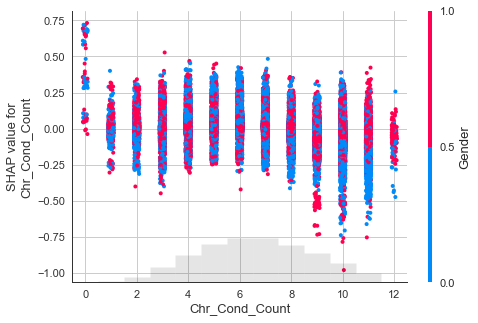

In [93]:
shap.plots.scatter(SMshap_values[:,'Gender'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'RenalDiseaseIndicator'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'State'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'County'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'Age'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'DOB_year'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'DOB_month'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'InscClaimAmtReimbursed'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'AttendingPhysician'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'OtherPhysician'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'DeductibleAmtPaid'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'ClmDiagnosisCode_2'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'ClmProcedureCode_2'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'Hospital_Stay'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'Claim_Start_Month'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'Insurance_Covered_Per'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'Total_Claim_Amt'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'Physician_Count'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'Hospital_Count'], color=SMshap_values)
shap.plots.scatter(SMshap_values[:,'Chr_Cond_Count'], color=SMshap_values)

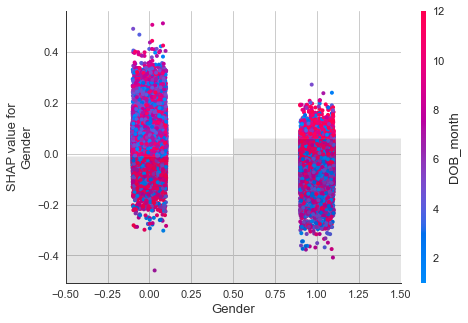

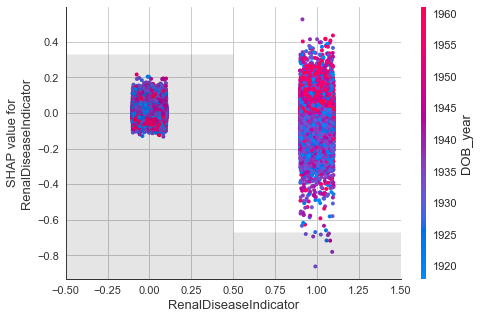

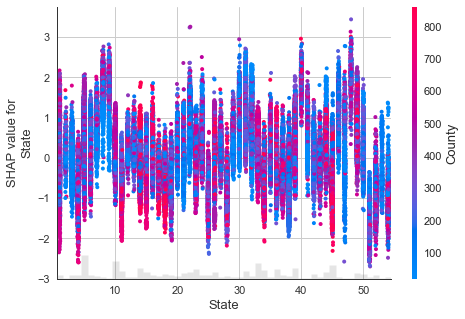

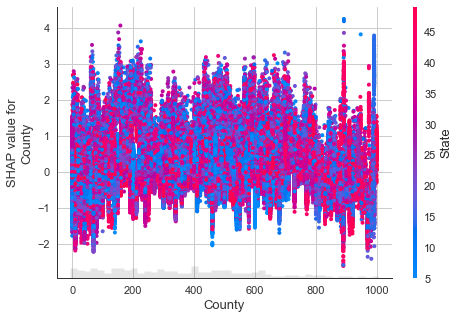

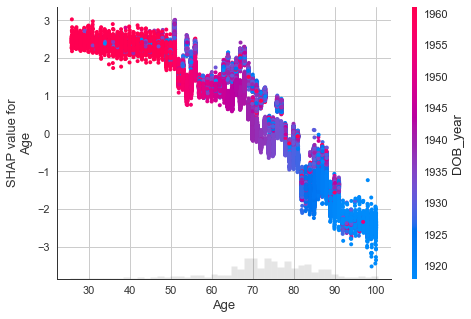

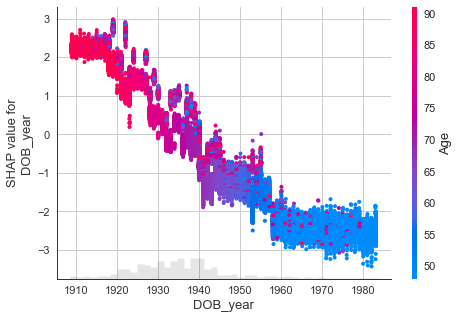

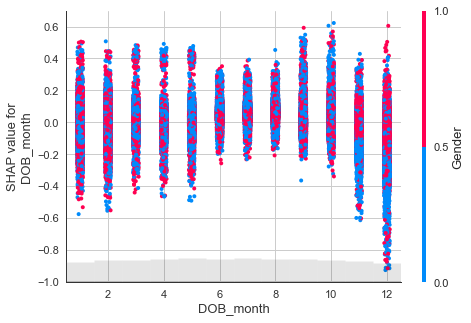

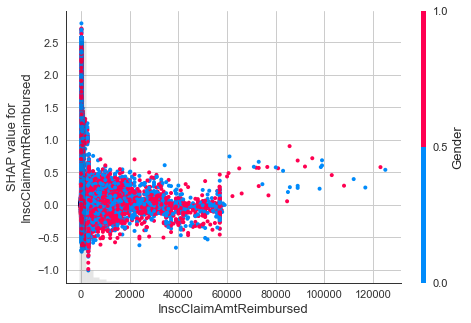

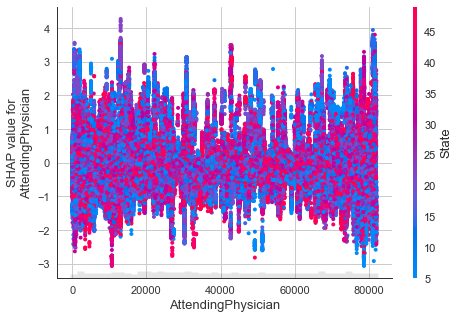

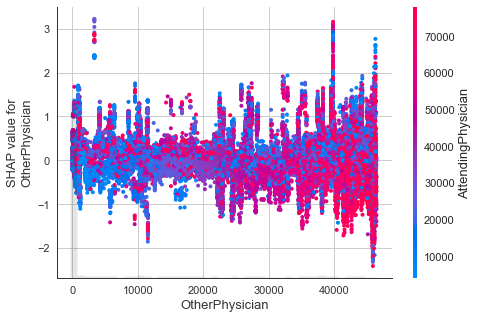

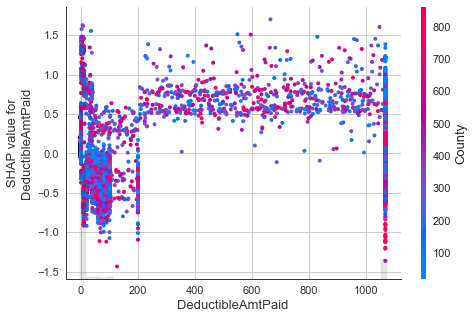

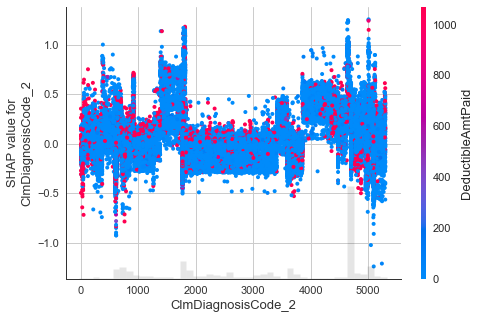

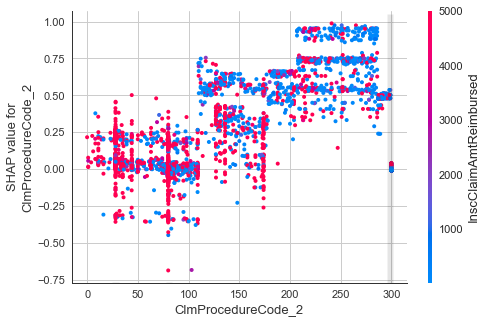

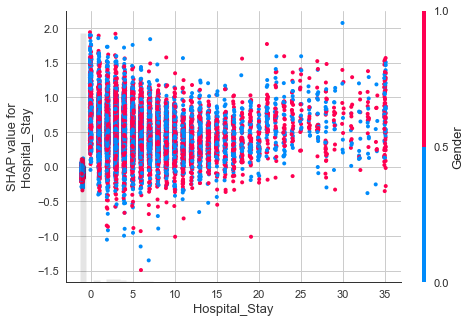

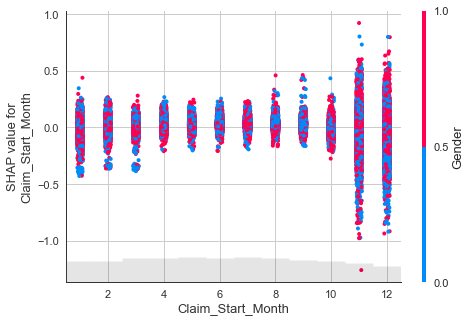

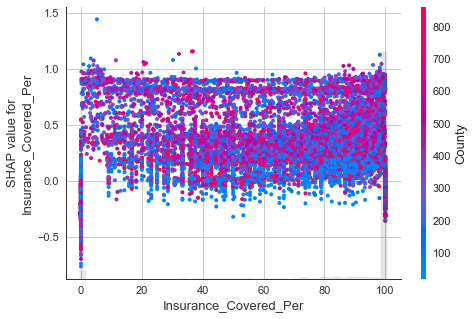

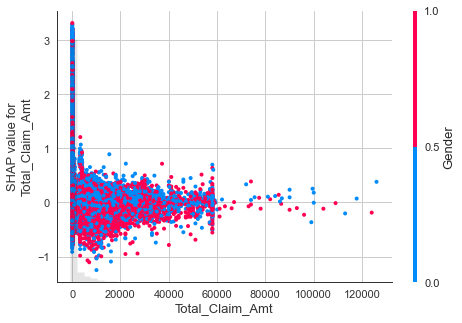

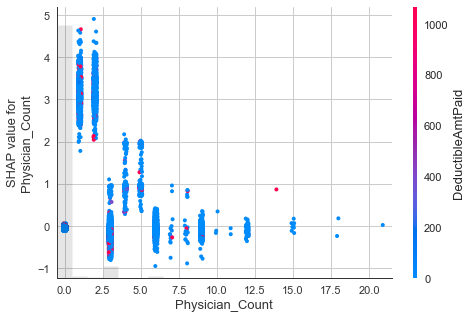

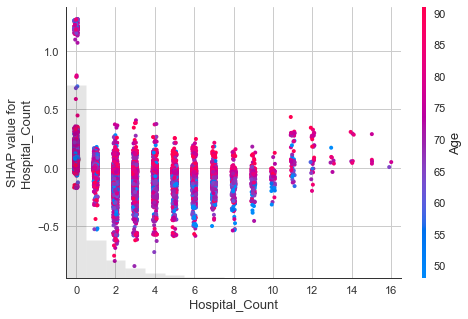

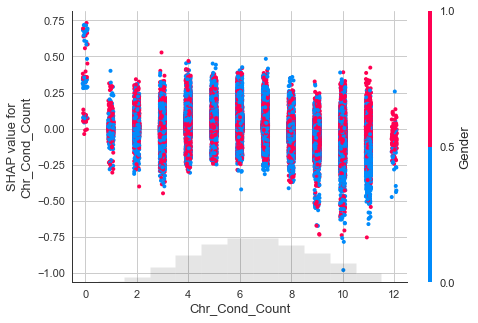

In [94]:
shap.plots.scatter(SMshap_values[:,'Gender'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'RenalDiseaseIndicator'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'State'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'County'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'Age'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'DOB_year'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'DOB_month'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'InscClaimAmtReimbursed'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'AttendingPhysician'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'OtherPhysician'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'DeductibleAmtPaid'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'ClmDiagnosisCode_2'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'ClmProcedureCode_2'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'Hospital_Stay'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'Claim_Start_Month'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'Insurance_Covered_Per'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'Total_Claim_Amt'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'Physician_Count'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'Hospital_Count'], color=BSMshap_values)
shap.plots.scatter(SMshap_values[:,'Chr_Cond_Count'], color=BSMshap_values)